In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [2]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [4]:
data_clf = data[features + [target]].copy()

In [5]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
data_clf['Age'] = data_clf['Age'].fillna(data_clf['Age'].median())
data_clf['Embarked'] = data_clf['Embarked'].fillna(data_clf['Embarked'].mode()[0])

In [7]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    data_clf[column] = label_encoders[column].fit_transform(data_clf[column])

In [9]:
data_clf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,28.0,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


In [10]:
from sklearn.model_selection import train_test_split

X = data_clf.drop('Survived', axis=1)
y = data_clf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



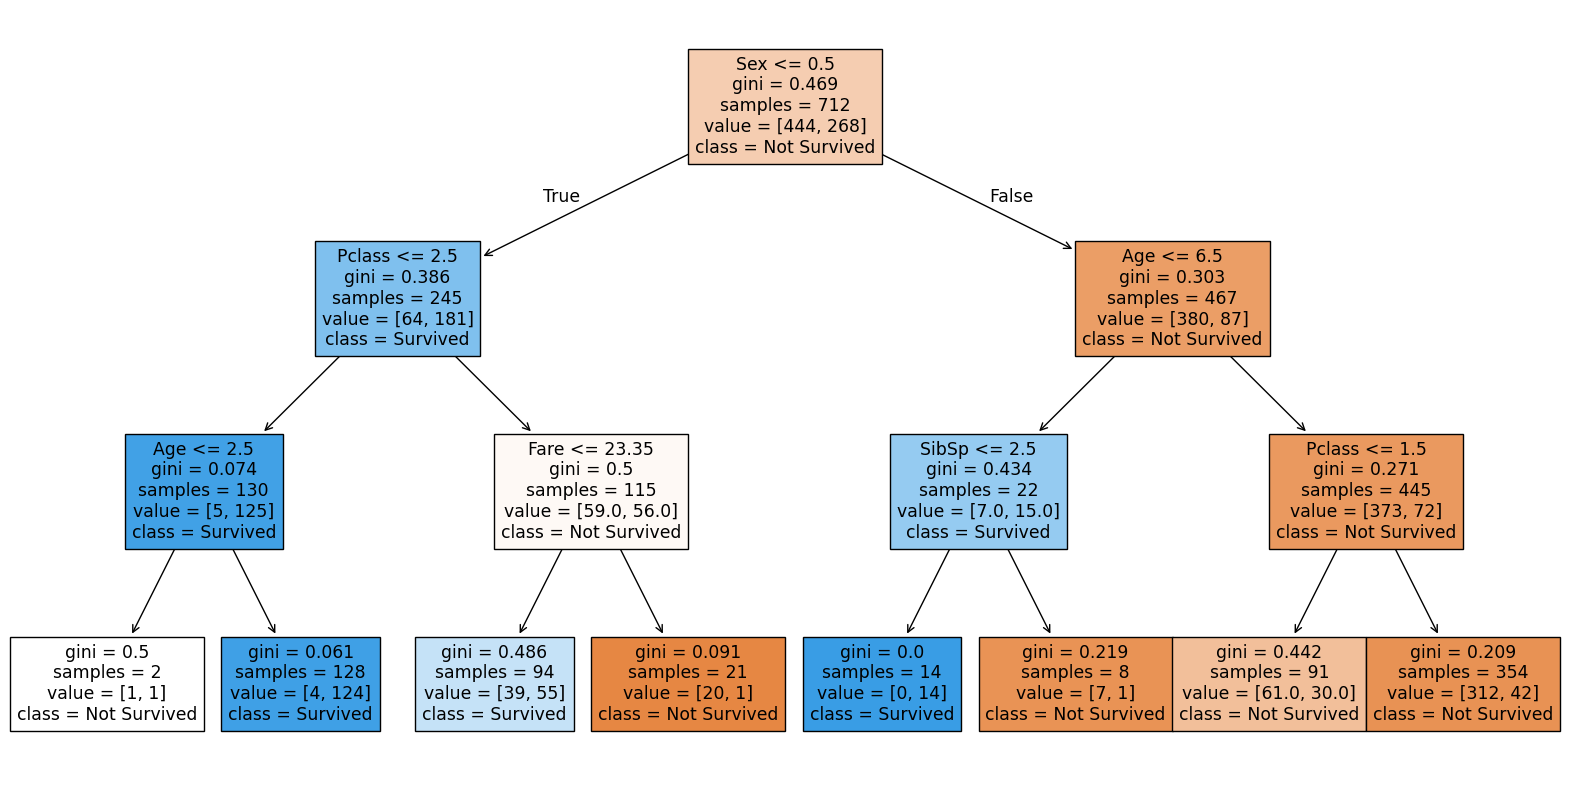

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'])
plt.show()

In [15]:
importancia_variaveis = pd.Series(clf.feature_importances_, index=X.columns)
importancia_variaveis.sort_values(ascending=False)

,0
Sex,0.605737
Pclass,0.209536
Age,0.075353
Fare,0.061240
SibSp,0.048135
Parch,0.000000
Embarked,0.000000


In [16]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target = 'Fare'

data = data_clf[features + [target]].copy()

In [17]:
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [18]:
X = data_clf.drop('Fare', axis=1)
y = data_clf['Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 1041.2997972894157
R2: 0.5171544854689867


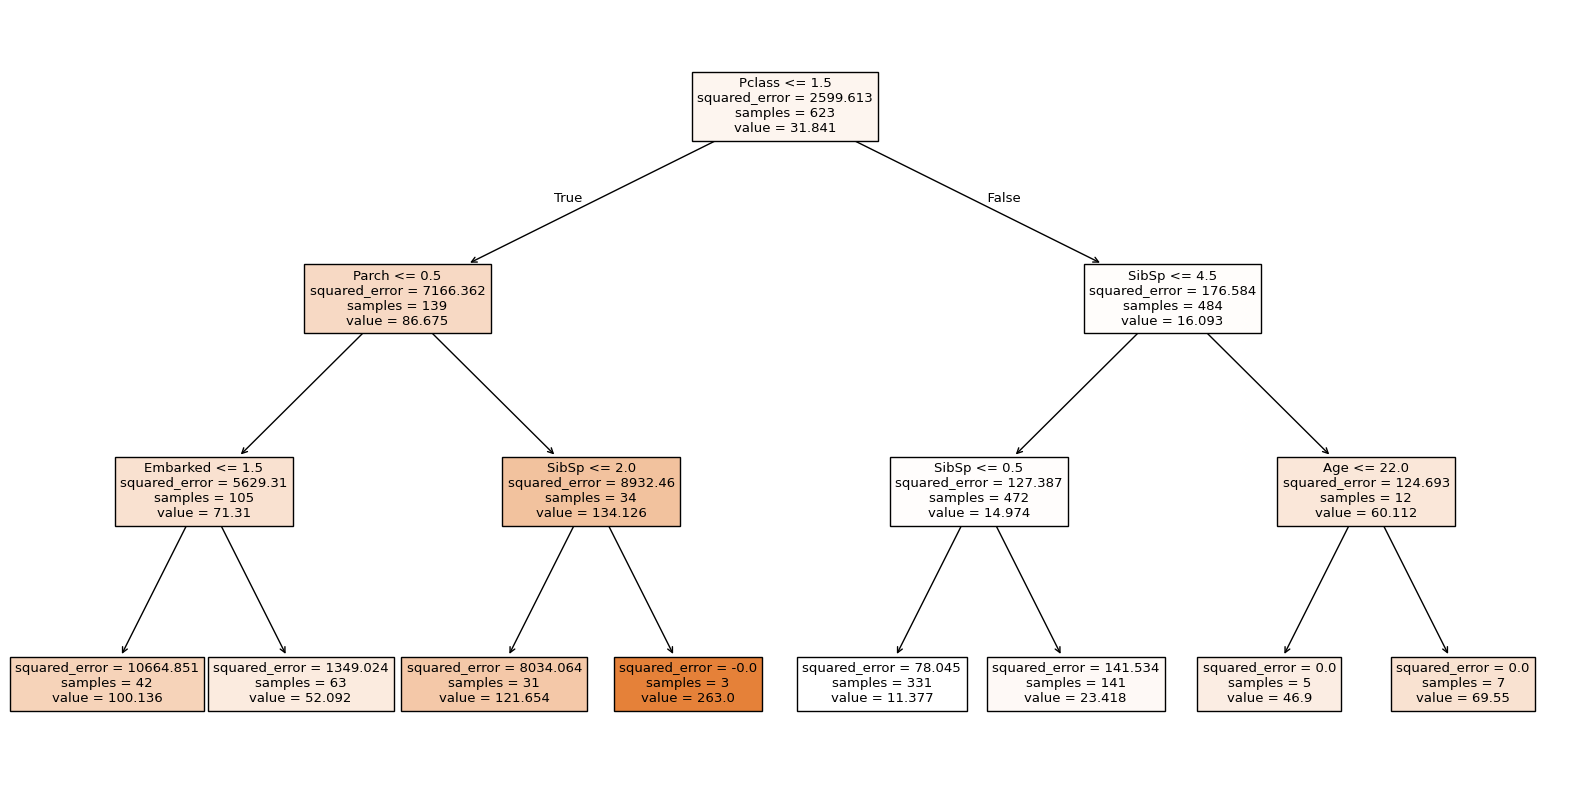

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          feature_names=X.columns
          )
plt.show()

In [23]:
importancia_variaveis2 = pd.Series(clf.feature_importances_, index=X.columns)
importancia_variaveis2.sort_values(ascending=False)

,0
Pclass,0.679423
Parch,0.127990
SibSp,0.117238
Embarked,0.073459
Age,0.001890
Sex,0.000000
Survived,0.000000


# Exercício:
>Usamos holdout. Mas se treinarmos com Kfold Cross Validation, podemos expor o modelo a variações dos dados dataset.

Aplicar kfold cross validation:

In [24]:
from sklearn.metrics import (recall_score, precision_score, f1_score,
                            accuracy_score, confusion_matrix,
                            roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt
from IPython.display import display

def avalia_modelo(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Recall': recall_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

    print("\nMatriz de Confusão:")
    display(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Previsto Não', 'Previsto Sim'],
             index=['Real Não', 'Real Sim']))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('Curva ROC')
    plt.show()

    return pd.DataFrame([metrics])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

modelo = LogisticRegression()
holdout_metricas = avalia_modelo(X_train, X_test, y_train, y_test, modelo)

holdout_metricas

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
from sklearn.model_selection import KFold, cross_validate

# Validação cruzada tradicional

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = cross_validate(modelo, X, y, cv=kf, scoring=['recall', 'precision', 'f1', 'accuracy', 'roc_auc'], return_train_score=False)

print ("----Métricas k-fold tradicional----")
kfold_metricas = pd.DataFrame(
    { 'Recall': cv_metrics['test_recall'],
      'Precisão': cv_metrics['test_precision'],
      'F1-Score': cv_metrics['test_f1'],
      'Acurácia': cv_metrics['test_accuracy'],
      'AUC-ROC': cv_metrics['test_roc_auc']
      }
)
kfold_metricas

In [ ]:
display(kfold_metricas.describe().loc[['mean', 'std']])

In [ ]:
plt.figure(figsize=(12, 6))
metrics_list = ['Recall', 'Precisão', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(['Holdout', 'k-Fold', 'Stratified'],
            [holdout_metricas[metric].values[0],
             kfold_metricas[metric].mean(),
             skf_metricas[metric].mean()])
    plt.title(metric)
    if metric == 'Recall':
        plt.ylim(0, 1)

plt.tight_layout()
plt.show()